In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename
from ieee_train import eval_train
from kaggle_utils import reduce_mem_usage, move_feature

In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET]

paths_train = glob('../feature/raw_use/*_train.gz')
paths_test = glob('../feature/raw_use/*_test.gz')

paths_train = [path for path in paths_train ]
paths_test  = [path for path in paths_test  ]

df_train = reduce_mem_usage( parallel_load_data(paths_train) )
df_test  = reduce_mem_usage( parallel_load_data(paths_test) )

Memory usage of dataframe is 306.93 MB
Memory usage after optimization is: 307.50 MB
Decreased by -0.2%
Memory usage of dataframe is 486.12 MB
Memory usage after optimization is: 541.69 MB
Decreased by -11.4%


In [3]:
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

  4%|▍         | 10/247 [00:00<00:02, 99.11it/s]

* Check Unique Feature.


100%|██████████| 247/247 [00:02<00:00, 104.76it/s]


All Features have info.
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.903633
Early stopping, best iteration is:
[175]	valid_0's auc: 0.903999
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[92]	valid_0's auc: 0.89326
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.884115
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[138]	valid_0's auc: 0.898164
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.894559
Early stopping, best iteration is:
[163]	valid_0's auc: 0.895932
* Check Corr with Past Submit.
  * LB0.9422 / 0.908712350462526
  * LB0.9446 / 0.9653212583479979
  * LB0.9518 / 0.9617836819929526
* Training Feature Importance


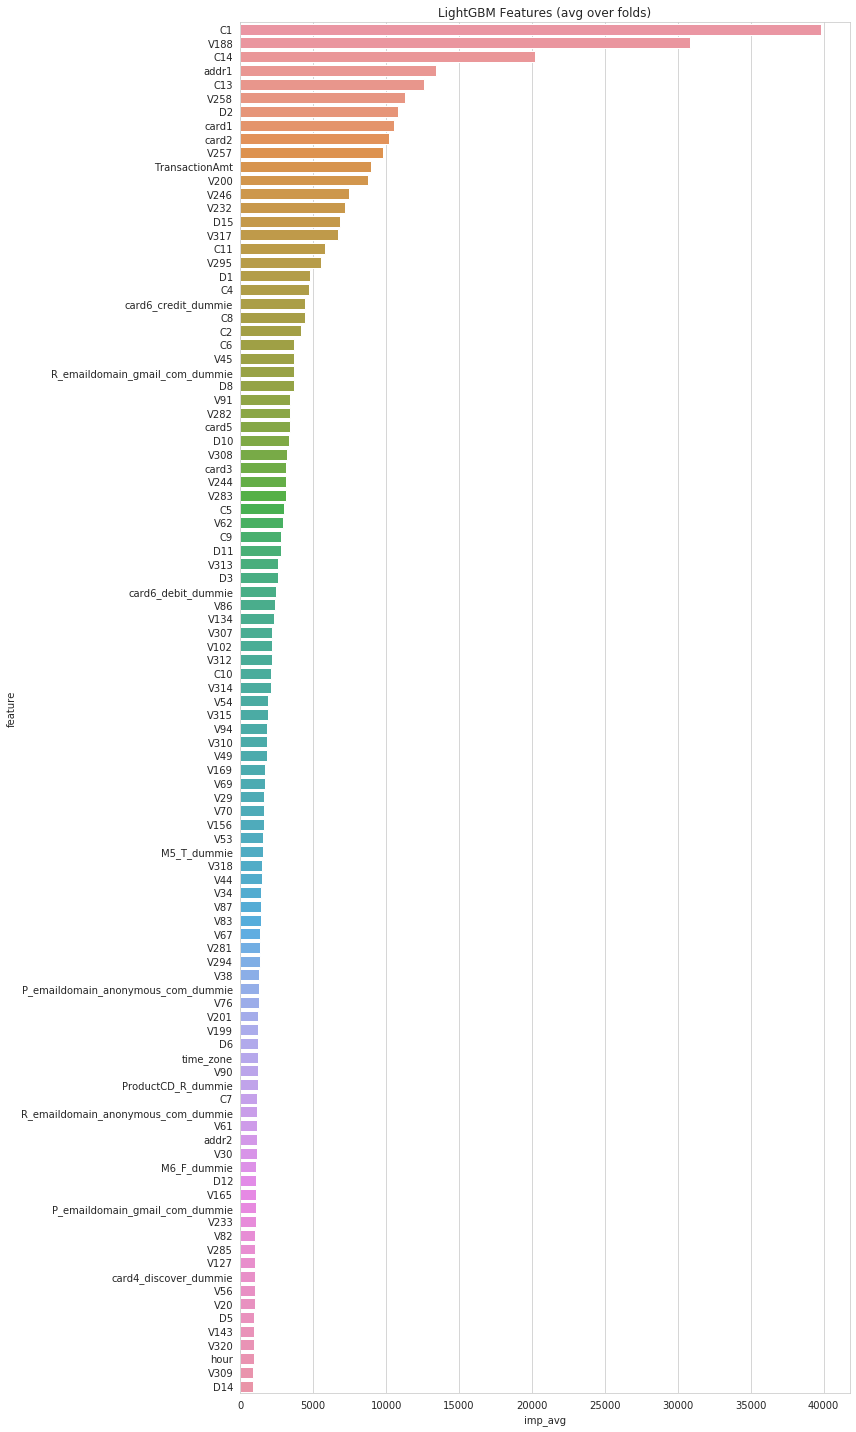

Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.855388
[400]	valid_0's auc: 0.863382
[600]	valid_0's auc: 0.867003
[800]	valid_0's auc: 0.869495
[1000]	valid_0's auc: 0.871185
[1200]	valid_0's auc: 0.872533
[1400]	valid_0's auc: 0.873584
[1600]	valid_0's auc: 0.874544
Early stopping, best iteration is:
[1701]	valid_0's auc: 0.874885
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.861329
[400]	valid_0's auc: 0.868722
[600]	valid_0's auc: 0.872152
[800]	valid_0's auc: 0.87432
[1000]	valid_0's auc: 0.875912
[1200]	valid_0's auc: 0.877098
[1400]	valid_0's auc: 0.877812
[1600]	valid_0's auc: 0.878426
Early stopping, best iteration is:
[1699]	valid_0's auc: 0.878776
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.858454
[400]	valid_0's auc: 0.868235
[600]	valid_0's auc: 0.871811
[800]	valid_0's auc: 0.874171
[1000]	valid_0's auc: 0.876392
[1200]	valid_0's auc: 0.877882
[1400]	valid_

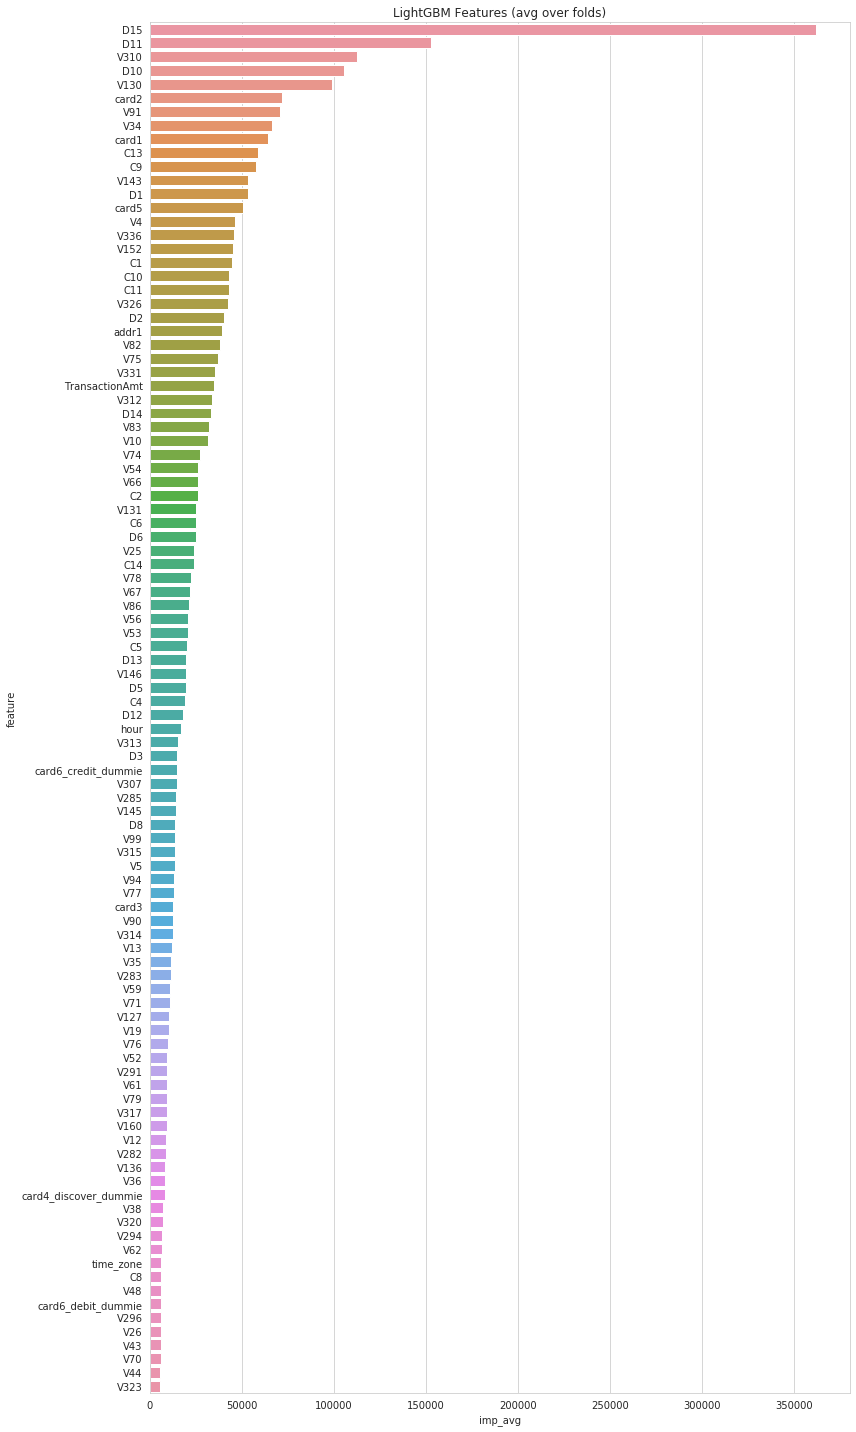

Setup Dataset dim_ml_dataset.


In [4]:
same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
model_type = "lgb"
params = {
    'n_jobs': 60,
    'seed': 1208,
    'n_splits': 5,
    'metric': 'auc',
    'model_type': model_type,
    'objective': 'binary',
    'fold': ['stratified', 'group'][1],

    'num_leaves': 2**6-1,
    'max_depth': -1,
    'subsample': 1.0,
    'subsample_freq': 1,
    'colsample_bytree' : 0.25,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
}
df_feim, adv_df_feim = eval_train(
    df_train,
    Y,
    df_test,
    same_user_path,
    model_type,
    params,
    is_adv=True,
    is_corr=False,
    is_viz=True,
)